<a href="https://colab.research.google.com/github/200Richa/Data-Analysis-and-Visualization/blob/main/Popular_Programming_Languages/Popular_Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyse the Popularity of Different Programming Languages over Time**

![Languages](https://img-c.udemycdn.com/redactor/raw/2020-10-10_09-21-02-599838d7e6f3adad2ebb79ad437120da.jpg)



---

The oldest programming language still in use today is FORTRAN, which was developed in 1957. Since then many other programming languages have been developed. But which programming language is the most popular? Which programming language is the Kim Kardashian of programming languages; the one people just can't stop talking about?


---
StackOverflow will help us answer this burning question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language.

To figure out which language is the most popular, all we need to do is count the number of posts on Stack Overflow that are tagged with each language. The language with the most posts wins!


### **Get the Data**

Get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

### **Data Exploration**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,163
...,...,...,...
2253,2022-02-01 00:00:00,php,4244
2254,2022-02-01 00:00:00,python,24109
2255,2022-02-01 00:00:00,r,4464
2256,2022-02-01 00:00:00,ruby,476


In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,163


In [5]:
df.tail()

,DATE,TAG,POSTS
2253,2022-02-01 00:00:00,php,4244
2254,2022-02-01 00:00:00,python,24109
2255,2022-02-01 00:00:00,r,4464
2256,2022-02-01 00:00:00,ruby,476
2257,2022-02-01 00:00:00,swift,2008


In [7]:
df.shape

(2258, 3)

In [8]:
df.count()

DATE     2258
TAG      2258
POSTS    2258
dtype: int64

+ How to count the number of posts per language?

In [39]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,163,163
c,163,163
c#,164,164
c++,163,163
delphi,163,163
go,148,148
java,163,163
javascript,163,163
perl,163,163


In [16]:
df.groupby('TAG')['POSTS'].sum()

TAG
assembly        39660
c              374727
c#            1523660
c++            755306
delphi          49289
go              59605
java          1828239
javascript    2338777
perl            66453
php           1428275
python        1895154
r              437843
ruby           222962
swift          309378
Name: POSTS, dtype: int64

+ Which programming language had the most number of posts since the creation of Stack Overflow? 

In [21]:
max_posts = df.groupby('TAG')['POSTS'].sum().max()
max_posts

2338777

In [25]:
max_posts_lang = df.groupby('TAG')['POSTS'].sum().idxmax()
max_posts_lang

'javascript'

In [26]:
print(f"{max_posts_lang} has maximum posts of {max_posts}")

javascript has maximum posts of 2338777




---


+ Some languages are older like C and other languages are newer (like Swift). The dataset starts in July 2008, so some languages will not have any posts for every month. Count how many months of posts exist for each programming language? 

In [27]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,163,163
c,163,163
c#,164,164
c++,163,163
delphi,163,163
go,148,148
java,163,163
javascript,163,163
perl,163,163


### **Data Cleaning: Working with Time Stamps**

+ Selecting an Individual Cell

In [28]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [29]:
df.DATE[1]

'2008-08-01 00:00:00'

+ Inspecting the Data Type

Lets change the Date Format from '2008-08-01 00:00:00' to '2008-08-01'



In [30]:
type(df.DATE[1])

str

Pandas can help us convert the string to a timestamp using the to_datetime() method

In [31]:
df.DATE = pd.to_datetime(df.DATE) # changes Date column from string data type to date datatype
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163


In [32]:
type(df.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

### **Data Manipulation: Pivoting DataFrames**

How to pivot a category ?

In [36]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,221.0,2201.0,6019.0,4078.0,150.0,761.0,7770.0,16169.0,131.0,4264.0,22913.0,4743.0,479.0,1844.0
2021-11-01,311.0,2342.0,6400.0,4176.0,151.0,705.0,8296.0,15870.0,81.0,4139.0,23436.0,4631.0,449.0,1765.0
2021-12-01,289.0,2266.0,5748.0,3882.0,159.0,773.0,7567.0,15350.0,103.0,3766.0,22126.0,3933.0,437.0,1675.0


In [37]:
reshaped_df.shape

(164, 14)

In [40]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [41]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


In [42]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-10-01,221.0,2201.0,6019.0,4078.0,150.0,761.0,7770.0,16169.0,131.0,4264.0,22913.0,4743.0,479.0,1844.0
2021-11-01,311.0,2342.0,6400.0,4176.0,151.0,705.0,8296.0,15870.0,81.0,4139.0,23436.0,4631.0,449.0,1765.0
2021-12-01,289.0,2266.0,5748.0,3882.0,159.0,773.0,7567.0,15350.0,103.0,3766.0,22126.0,3933.0,437.0,1675.0
2022-01-01,241.0,2080.0,5953.0,3909.0,151.0,796.0,7769.0,16398.0,131.0,4051.0,22765.0,4273.0,477.0,2007.0
2022-02-01,247.0,1940.0,6234.0,3802.0,193.0,744.0,7944.0,16697.0,97.0,4244.0,24109.0,4464.0,476.0,2008.0


In [43]:
reshaped_df.count()

TAG
assembly      163
c             163
c#            164
c++           163
delphi        163
go            148
java          163
javascript    163
perl          163
php           163
python        163
r             161
ruby          163
swift         155
dtype: int64

In [46]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,164.0,28.0,160.0,122.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,221.0,2201.0,6019.0,4078.0,150.0,761.0,7770.0,16169.0,131.0,4264.0,22913.0,4743.0,479.0,1844.0
2021-11-01,311.0,2342.0,6400.0,4176.0,151.0,705.0,8296.0,15870.0,81.0,4139.0,23436.0,4631.0,449.0,1765.0
2021-12-01,289.0,2266.0,5748.0,3882.0,159.0,773.0,7567.0,15350.0,103.0,3766.0,22126.0,3933.0,437.0,1675.0


In [48]:
reshaped_df.isna().values.any()

False

### **Data Visualisation with Matplotlib**

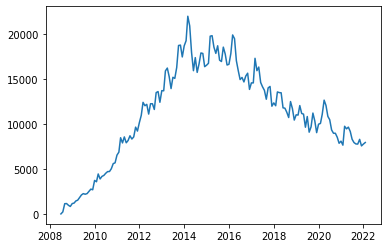

In [51]:
plt.plot(reshaped_df.java) 
# plt.plot(reshaped_df.index, reshaped_df.java)

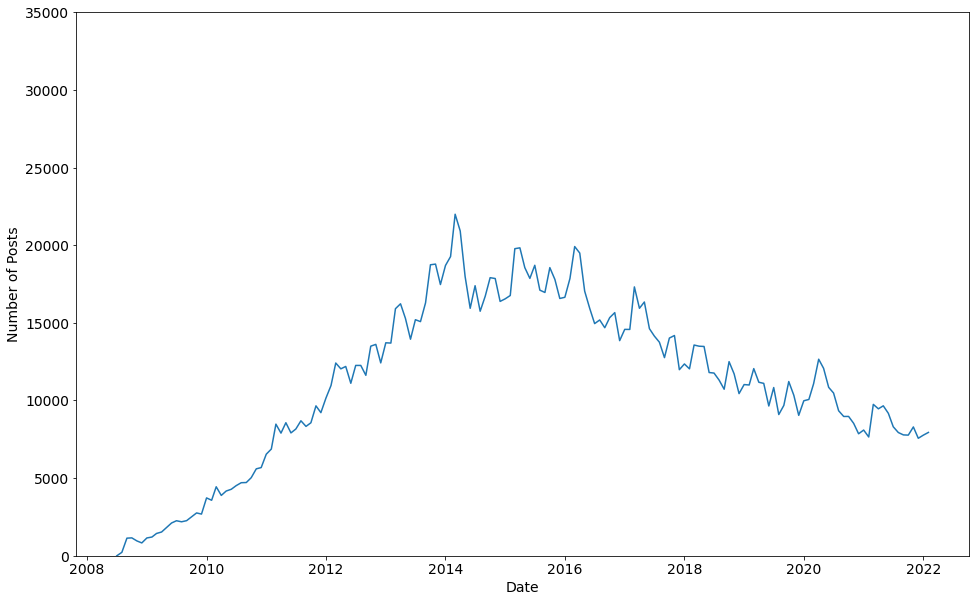

In [53]:
# Styling the graph

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)


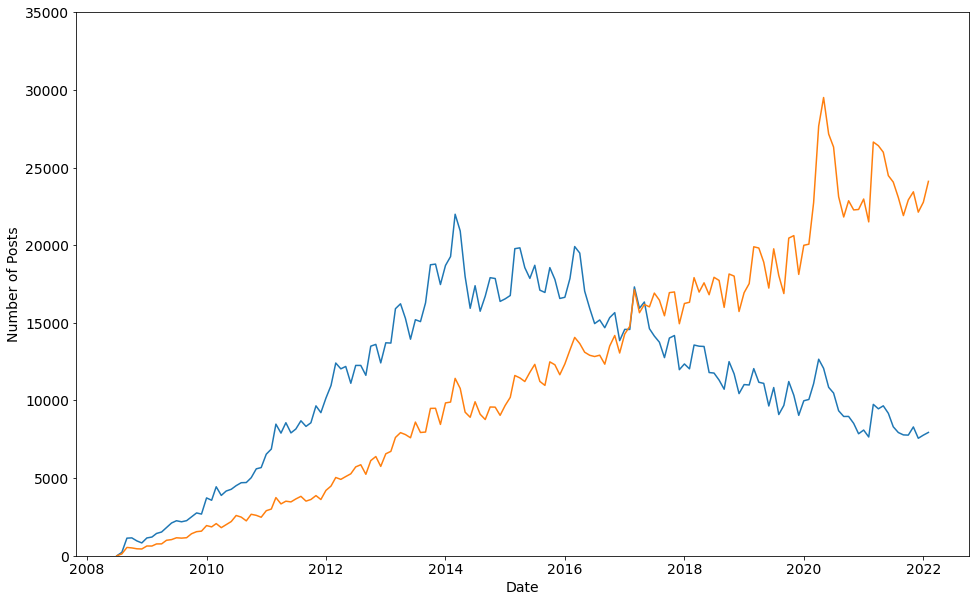

In [54]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot two languages
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

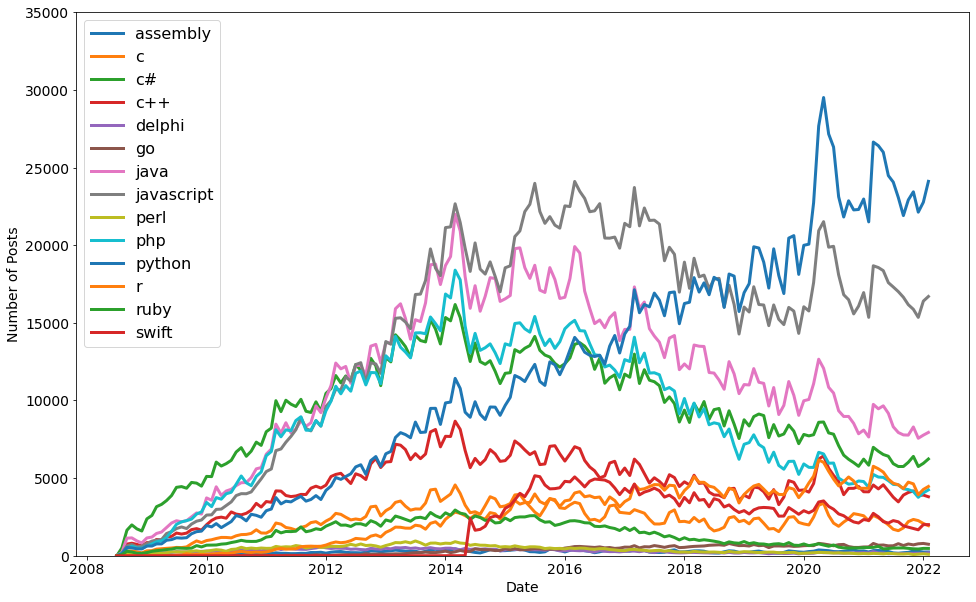

In [57]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot all languages using loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win! =) 



---

### **Smoothing out Time-Series Data**
Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.

A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). We can chain these two methods up to create a DataFrame made up of the averaged observations. 


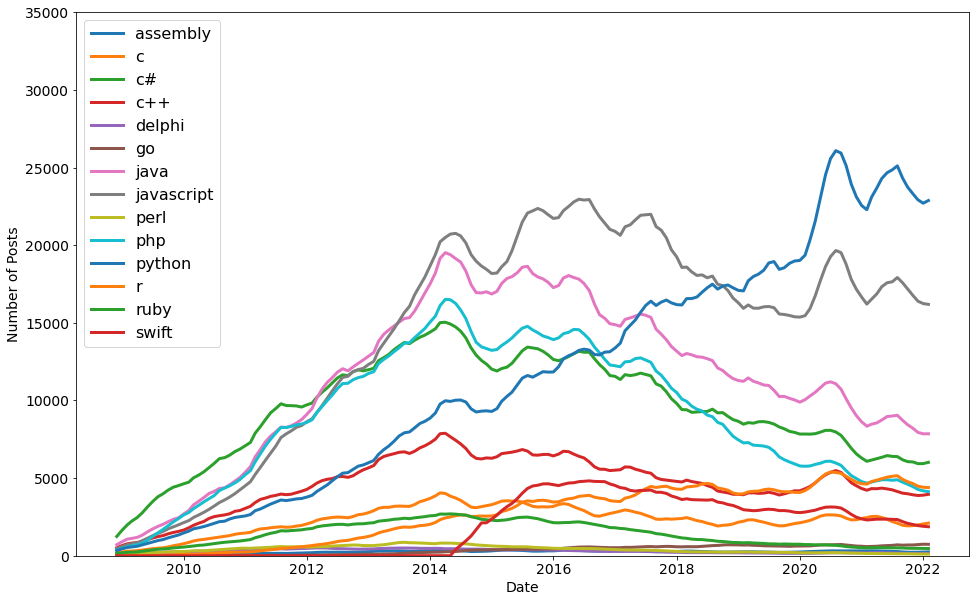

In [61]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)